## STOCK PRICE FORECASTING

#### What is Stock Market?
     It is a place where shares of pubic listed companies are traded. The primary market is where companies float shares to the general public in an initial public offering (IPO) to raise capital.

#### More about Stock Market : -
##### Organized Body
    A stock exchange is an organized body with a management committee and rules that control how the exchange works. Traders on the exchange are subject to the rules of the exchange, which are enforced by the management committee. At one time, a stock market was a physical place where traders met face-to-face to make deals, but today most trades take place electronically.
    
##### Public Company Stock
    Public companies are a key component of stock markets. Public companies are those that have stock that is bought and sold on a public stock exchange. Before a stock can be sold, it must first be listed on the exchange. To protect its investors, a public company is required to disclose financial and business information that could affect stock value.

##### Trading Through Brokers
    Trading on a stock exchange is restricted to stock brokers and traders who are members of the exchange. Individual investors must have a brokerage account in order to participate in trading. For many people, brokerage services are provided as part of an employer-sponsored retirement investment fund. For individuals who want to trade independently, an individual account is required.

##### Going Public with IPOs
    Initial public offerings (IPOs) are the mechanism used to introduce a company’s stock for public sale on a stock exchange. An IPO is said to take place in the primary market, with follow-on trading between investors occurring in the secondary market. An IPO allows a company to raise capital for future growth by selling shares to the public.

##### Stock Prices Reflect Supply and Demand
    The price of a company’s stock reflects supply and demand for the stock itself and is often independent of the company’s success. A company’s stock may be considered desirable for a variety of reasons, from the strength of an industry sector to the popularity of a brand.

##### Stock Market Prediction
    In order to make a profit, stock market traders must predict whether a stock’s value will rise. Share prices often reflect the overall economy and can be volatile as investors react to financial news and current events, but traders who are successful predictors can realize significant gains.

#### Equity Data : -
    The securities market has two interdependent and inseparable segments, the new issues (primary) market and the stock (secondary) market. The primary market provides the channel for creation and sale of new securities, while the secondary market deals in securities previously issued. The Stock market or Equities market is where listed securities are traded in the secondary market. Currently more than 1300 securities are available for trading on the Exchange.

#### Project Includes : -
    1. Data Scraping
    2. Data Cleaning
    3. Insights Plotting
    4. Features Creation
    5. Machine Learning Modeling

#### Machine Learning Model Used : -
    Our aim are to use the as simple ml model as it is.
    Models Used
        1. Linear Regression
        2. Lasso (Type of Linear Model)
        3. Random Forest (An Ensemble Model)
        4. Extra Tree (A Tree Based ML Model)
        5. Decision Tree
        6. KNearest Neighbors (Use Euclidean Distance)
        
    Ultimately, the simple ml model worked well in each and every dataset.

#### Focus Area : -
    1. Feature Engineering including features creation
    2. Simple modeling
    3. Future forecasting
    4. Error reduction using different ml models

### Importing Dependencies

In [1]:
#The final notebook of the Time Series Analysis (Minor Project)
#Completely focused on the forecasting (short term: 7 days, mid term: 30 days, long term: 240 days)

#Now, process data for the forecasting (prepare data previous I've been done by creating lots of features)

#import dependencies
import warnings #used to eliminate the warnings raised
warnings.filterwarnings('ignore')

import numpy as np #for scientific computation
import pandas as pd #for dataframe manipulation
import matplotlib.pyplot as plt #for simple plotting
import seaborn as sns #for advance plotting
import scipy.stats as st #for statictical purpose
import statsmodels.api as sm
import itertools
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso #models linear
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error #erro metrics
from collections import Counter
import os

In [2]:
import plotly.plotly as py #for advance plotting
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
init_notebook_mode(connected= True)

### Setups

In [3]:
%matplotlib inline

In [4]:
plt.style.use('ggplot')
sns.set_style('ticks')
sns.color_palette(palette= 'husl')
sns.set_color_codes()

pd.options.display.max_rows= 1000
pd.options.display.max_columns= 199

### Feature Creation

In [3]:
#I'm going to use the previous function what I used for the data preprocessing
import talib as tb

#All about the feature creation
def feature_creation(full_df, index_list, path):
    
    #date extraction
    full_df['year']= full_df['Date'].dt.year
    full_df['Month']= full_df['Date'].dt.month
    full_df['Day']= full_df['Date'].dt.day
    #full_df['dayofweek']= full_df['Date'].df.dayofweek
    full_df['weekday']= full_df['Date'].dt.weekday
    full_df['weekofyear']= full_df['Date'].dt.weekofyear
    full_df['dayofyear']= full_df['Date'].dt.dayofyear

    full_df['Close_Prev1Day']= full_df.groupby('Stock')['Adj_Close'].shift(1)
    full_df['Close_Prev2Day']= full_df.groupby('Stock')['Adj_Close'].shift(2)
    full_df['Close_Prev3Day']= full_df.groupby('Stock')['Adj_Close'].shift(3)
    full_df['Close_Prev5Day']= full_df.groupby('Stock')['Adj_Close'].shift(5)

    full_df['Volume_Prev1Day']= full_df.groupby('Stock')['Volume'].shift(1)
    full_df['Volume_Prev2Day']= full_df.groupby('Stock')['Volume'].shift(2)
    full_df['Volume_Prev3Day']= full_df.groupby('Stock')['Volume'].shift(3)
    full_df['Volume_Prev5Day']= full_df.groupby('Stock')['Volume'].shift(5)

    #get the difference and ratio
    for col1, col2 in [['Open', 'Close'],
                       ['High', 'Low'],
                       ['Close', 'Close_Prev1Day'],
                       ['Close', 'Close_Prev2Day'],
                       ['Close', 'Close_Prev3Day'],
                       ['Close', 'Close_Prev5Day'],
                       ['Volume', 'Volume_Prev1Day'],
                       ['Volume', 'Volume_Prev2Day'], 
                       ['Volume', 'Volume_Prev3Day'], 
                       ['Volume', 'Volume_Prev5Day']]:
        full_df['Diff_'+col1+'_'+col2]= full_df[col1]-full_df[col2]
        full_df['Ratio_'+col1+'_'+col2]= full_df[col1]/full_df[col2]

    #Getting technical indicators
    full_df['Max_value_30_days']= full_df.groupby('Stock')['Close'].apply(tb.MAX)
    full_df['Min_value_30_days']= full_df.groupby('Stock')['Close'].apply(tb.MIN)

    ### Getting momentum indicators ###
    full_df["Momentum_10days"] = full_df.groupby("Stock")["Close"].apply(tb.MOM)
    full_df["Percentage_Price_Oscillator"] = full_df.groupby("Stock")["Close"].apply(tb.PPO)
    full_df["Rate_Of_Change"] = full_df.groupby("Stock")["Close"].apply(tb.ROC)
    full_df["Rate_Of_Change_Percentage"] = full_df.groupby("Stock")["Close"].apply(tb.ROCP)
    full_df["Rate_Of_Change_Ratio"] = full_df.groupby("Stock")["Close"].apply(tb.ROCR)
    full_df["Relative_Strength_Index"] = full_df.groupby("Stock")["Close"].apply(tb.RSI)

    ### Getting Overlapping indicators ###
    full_df["EMA"] = full_df.groupby("Stock")["Close"].apply(tb.EMA)
    full_df["DEMA"] = full_df.groupby("Stock")["Close"].apply(tb.DEMA)
    full_df["WMA"] = full_df.groupby("Stock")["Close"].apply(tb.WMA)

    ### Getting features from statistic functions of TA-LIB ###
    full_df["Linear_reg_prediction"] = full_df.groupby("Stock")["Close"].apply(tb.LINEARREG)
    full_df["stddev"] = full_df.groupby("Stock")["Close"].apply(tb.STDDEV)
    full_df["Time_Series_Forecast"] = full_df.groupby("Stock")["Close"].apply(tb.TSF)
    
    for ind in index_list:
        if ind!= '.ipynb_checkpoints':
            
            df= pd.read_csv(path+ind, parse_dates= ['Date'], usecols= ['Date', 'Change %'])
            df.rename(columns= {'Change %': 'Change'}, inplace= True)
            indx= ind.split('.')[0]
            df['Change']= df['Change'].apply(lambda x: float(str(x).replace("%","")))
            df.rename(columns= {'Change': indx}, inplace= True)
            full_df = pd.merge(full_df, df, on='Date', how='left')
            
    full_df= full_df.fillna(-999)
    
    return full_df

### Data Preparation

In [6]:





















#from sklearn.model_selection import train_test_split
def prepare_data_forecasting(df_full, day_to_forecast= 30):
    #Here, I passed the complete preprocessed data what I've done in previous notebook and duration to forecast
    #I directly passed the days to forecast it may be 7, 30, 240, etc.
    #Currently, I forecast out for 3 different time periods mentioned earlier (be default it forecasts for 30 days)
    forecast_out= day_to_forecast
    
    X= df_full.drop(['Adj_Close'], axis= 1)
    y= df_full['Adj_Close']

    X_lately = X[-forecast_out:]
    X = X[:-forecast_out]
    
    #split the data for training and cross validating in sequence wise
    #I take 20% of X data as validation set and rest as training set
    train_len= int(len(X)*0.8)
    X_train, X_test= X[:train_len], X[train_len:]
    y_train, y_test= y[:train_len], y[train_len:len(X)]
    
    #print(X_train['Adj_Close'][-30:], y_train[-30:])
    #print(X_test['Adj_Close'][-30:], y_test[-30:])
    #print(X_lately[['Date', 'Adj_Close']][-30:])
    
    #X_train_dt= X_train['Date']
    X_test_dt= X_test['Date']
    
    X_train.drop(['Date'], axis= 1, inplace= True)
    X_test.drop(['Date'], axis= 1, inplace= True)
    X_lately.drop(['Date'], axis= 1, inplace= True)
    
    return X_train, X_test, y_train, y_test, X_lately, X_test_dt, df_full

### Machine Learning Modeling

In [7]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def linear_regression(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.linear_model import LinearRegression
    
    model= LinearRegression()
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'Linear Regression')
    plot_forecasted(full_df, length, rmse, 'Linear Regression')
    
    return full_df, 'Linear Regression', rmse

In [8]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def lasso(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.linear_model import Lasso
    
    model= Lasso(alpha= 0.001)
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'Lasso')
    plot_forecasted(full_df, length, rmse, 'Lasso')
    
    return full_df, 'Lasso', rmse

In [9]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def random_forest(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.ensemble import RandomForestRegressor
    
    model= RandomForestRegressor(random_state= 2018)
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'Random Forest')
    plot_forecasted(full_df, length, rmse, 'Random Forest')
    
    return full_df, 'Random Forest', rmse

In [10]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def extr_tree(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.ensemble import ExtraTreesRegressor
    
    model= ExtraTreesRegressor(random_state= 2018)
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'Extra Tree')
    plot_forecasted(full_df, length, rmse, 'Extra Tree')
    
    return full_df, 'Extra Tree', rmse

In [11]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def decison_tree(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.tree import DecisionTreeRegressor
    
    model= DecisionTreeRegressor(random_state= 2018)
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'Decision Tree')
    plot_forecasted(full_df, length, rmse, 'Decision Tree')
    
    return full_df, 'Decision Tree', rmse

In [12]:
#After I've to prepare wrapper for the machine learning modeling and plotting the time series data
def k_nearest_neighbors(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df):
    
    #train.fillna(0, inplace= True)
    #test.fillna(0, inplace= True)
    #val.fillna(0, inplace= True)
    
    from sklearn.neighbors import KNeighborsRegressor
    
    model= KNeighborsRegressor()
    
    model.fit(X_train, y_train)
    
    #prediction
    prediction= model.predict(X_test)
    prediction_1= model.predict(X_lately)
    
    #print the accuracies and errors
    r_2= r2_score(y_test, prediction)
    mse= mean_squared_error(y_test, prediction)
    rmse= np.sqrt(mse)
    
    #print('The R-Squared value: {:.2f}' .format(r_2))
    #print('Mean Squared Error: {:.2f}' .format(mse))
    #print('Root Mean Squared Error: {:.2f}' .format(rmse))
    
    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': y_test})
    #df_val_tgt= pd.DataFrame({'Date': X_test_dt, 'target': prediction})
    df_val_tgt['predicted']= prediction

    length= full_df.shape[0]
    
    import datetime
    full_df['Date']= pd.to_datetime(full_df['Date'], dayfirst= True)
    last_date = full_df.iloc[-1].Date
    last_unix = last_date.timestamp()
    one_day = 86400
    next_unix = last_unix + one_day
    
    #full_df['forcasted']= np.nan
    for tg, i in zip(prediction_1, range(len(prediction_1))):
        next_date = datetime.datetime.fromtimestamp(next_unix)
        next_unix += 86400
        add_df= pd.DataFrame({'Date': next_date, 'Adj_Close': tg}, index= [i])
        full_df= pd.concat([full_df, add_df])
    
    #print(df_val_tgt)
    #print(df_val_tgt)
    plot_result(df_val_tgt, rmse, 'K Nearest Neighbors')
    plot_forecasted(full_df, length, rmse, 'K Nearest Neighbors')
    
    return full_df, 'KNearest Neighbors', rmse

### Insights Plotting

In [13]:
#Insights of the particular stock
def plot_insights(df):
    #Open, High, Low, Close plot
    trace_high= go.Scatter(
        x= df['Date'], 
        y= df['High'], 
        name= 'High'
    )
    trace_low= go.Scatter(
        x= df['Date'], 
        y= df['Low'], 
        name= 'Low'
    )
    trace_open= go.Scatter(
        x= df['Date'], 
        y= df['Open'], 
        name= 'Open'
    )
    trace_close= go.Scatter(
        x= df['Date'], 
        y= df['Close'], 
        name= 'Close'
    )
    data= [trace_high, trace_low, trace_open, trace_close]
    layout= dict(title= 'Open vs Close vs High vs Low')
    fig = go.Figure(data=data,layout=layout)
    iplot(fig, filename = 'Open High Low Close')
    
    #The target feature is Adj_Close price
    #Let check how does it varies in simple way as well as in MA of 7, 30 and 240 days
    trace_adjclose= go.Scatter(
        x= df['Date'], 
        y= df['Adj_Close'], 
        name= 'Adj Close',
        line = dict(
            width = 1.5
        )
    )
    trace_7_day_MA= go.Scatter(
        x= df['Date'], 
        y= df.set_index('Date')['Adj_Close'].rolling(7).mean(), 
        name= '7 Day MA',
        line = dict(
            width = 1,
            dash = 'dash'
        )
    )
    trace_30_day_MA= go.Scatter(
        x= df['Date'], 
        y= df.set_index('Date')['Adj_Close'].rolling(30).mean(), 
        name= '30 Day MA',
        line = dict(
            width = 1,
            dash = 'dash'
        )
    )
    trace_240_day_MA= go.Scatter(
        x= df['Date'], 
        y= df.set_index('Date')['Adj_Close'].rolling(240).mean(), 
        name= '240 Day MA',
        line = dict(
            width = 1,
            dash = 'dash'
        )
    )
    
    data= [trace_adjclose, trace_7_day_MA, trace_30_day_MA, trace_240_day_MA]
    layout= dict(title= 'Adj Close Price vs Moving Average (7, 30, 240)')
    fig= go.Figure(data= data, layout= layout)
    iplot(fig, filename= 'Adj Close vs MA')
    
    #percent change
    trace_pct= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Adj_Close'].pct_change(),
        name= 'Adj Close'
    )
    
    trace_pct_o= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Open'].pct_change(),
        name= 'Open'
    )
    
    trace_pct_h= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['High'].pct_change(),
        name= 'High'
    )
    
    trace_pct_l= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Low'].pct_change(),
        name= 'Low'
    )
    
    data= [trace_pct, trace_pct_h, trace_pct_l, trace_pct_o]
    layout= dict(title= 'Percent Change (Adj Close, Open, High, low)')
    fig= go.Figure(data= data, layout= layout)
    iplot(fig, filename= 'Percent Change')
    #Check how the target feature is correlated with independent features
    #simple I want to figure out which features highly correlated with target feature
    corr= df.corr()
    corr_target= corr['Adj_Close'].sort_values(ascending= False)
    trace_corr= go.Bar(y= corr_target,
                       x= corr_target.index,
                      )
    data= [trace_corr]
    layout= dict(title= 'Correlation Plot')
    fig= go.Figure(data= data, layout= layout)
    iplot(fig, filename= 'Correlation Plot')

### Validation Plot

In [14]:
def plot_result(df, rmse, name):
    plt.figure(figsize= (16, 5))
    plt.plot(df['Date'], df['target'], label= 'Original')
    plt.plot(df['Date'], df['predicted'], label= 'Predicted')
    plt.title('Original vs Predicted: Using {}, RMSE: {:.4f}' .format(name, rmse))
    plt.legend(loc= 'best')
    plt.show()

### Forecasting Plot

In [15]:
#Use to plot the result of the modeling
def plot_forecasted(df, length, rmse, name):
    trace_ori= go.Scatter(
        x= df[:length]['Date'],
        y= df[:length]['Adj_Close'],
        name= 'Original'
    )
    
    trace_pred= go.Scatter(
        x= df[length:]['Date'],
        y= df[length:]['Adj_Close'],
        name= 'Forecasted'
    )
    
    #trace_forecast= go.Scatter(
    #    x= df[length:]['Date'],
    #    y= df[length:]['predicted'],
    #    name= 'Forecasted'
    #)
    
    trace_7MA= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Adj_Close'].rolling(7).mean(),
        name= 'MA(7)',
        line= dict(dash= 'dash')
    )
    
    trace_30MA= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Adj_Close'].rolling(30).mean(),
        name= 'MA(30)',
        line= dict(dash= 'dash')
    )
    
    trace_240MA= go.Scatter(
        x= df['Date'],
        y= df.set_index('Date')['Adj_Close'].rolling(240).mean(),
        name= 'MA(240)',
        line= dict(dash= 'dash')
    )
    
    data= [trace_ori, trace_pred, trace_7MA, trace_30MA, trace_240MA]
    layout= dict(title= 'Using {} (RMSE: {:.4f})' .format(name, rmse))
    fig= go.Figure(data= data, layout= layout)
    iplot(fig, filename= 'Result')

### Finding Most Profitable Duration

In [16]:
def most_profitable_time(df):
    
    print('Finding the most profitable period...')
    
    from IPython.display import Image, display
    #display(Image("Visiting-three-different-Targets-your-immediate-location-searching-popular-lamp-you-MUST-have.gif"))
    df= df.reset_index(drop= True)
    max_= 0
    for i in range(0, len(df)):
        for j in range(i+1, len(df)):
            
            diff= df.iloc[j]['Adj_Close']-df.iloc[i]['Adj_Close']

            #print(str(df.iloc[j]['Date'])+'  '+str(df.iloc[j]['Adj_Close'])+'  '+str(df.iloc[i]['Date'])+'  '+str(df.iloc[i]['Adj_Close']))

            if max_<diff:
                k= i
                l= j
                max_= diff

    

    print('The Max Profit Gain between the Date {} and {} is {}' .format(str(df.iloc[k]['Date']), 
                                                                         str(df.iloc[l]['Date']), max_))


### Main Function

In [17]:
def read_data():
    
    path= 'G://Data Science//stock//stockdata//'
    
    file_name= input('Enter the stock name: ')
    day_to_forecast= int(input('Enter the day to forecast: '))
    
    try:
        model_select= []
        
        df= pd.read_csv(path+file_name+'.csv', parse_dates= ['Date'])
        df['Date']= pd.to_datetime(df['Date'], dayfirst= True)
        #change the variable name
        df.rename(columns= {'Last': 'Adj_Close', 'Total Trade Quantity': 'Volume'}, inplace= True)

        df.drop(['Turnover (Lacs)'], axis= 1, inplace= True)

        #Add index data
        index_list= os.listdir('G://Data Science//stock//index//')

        path1= 'G://Data Science//stock//index//'

        full_df= feature_creation(df, index_list, path1)

        plot_insights(full_df)
        #print(full_df.head(3))
        full_df.drop(['Stock', 'Close', 'Open', 'High', 'Low'], axis= 1, inplace= True)
        X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df= prepare_data_forecasting(full_df, day_to_forecast)

        for model in [linear_regression, lasso, random_forest, extr_tree, decison_tree, k_nearest_neighbors]:
            df, name, rmse= model(X_train, X_test, y_train, y_test, X_lately, X_test_dt, full_df)
            model_select.append((df, name, rmse))
         
        #Method to choose the best model among them
        best_rmse= np.inf
        for model in model_select:
            if model[2]<best_rmse:
                best_rmse= model[2]
                best_model= model
                
        #Now plot the model
        df_, name_, rmse_= best_model[0], best_model[1], best_model[2]
        plot_forecasted(df_, len(full_df), rmse_, name_+' (Best Model)')
        
        most_profitable_time(df_[len(full_df):])
        
    except:
        print('File not present')

Enter the stock name: ADANIPORTS
Enter the day to forecast: 100


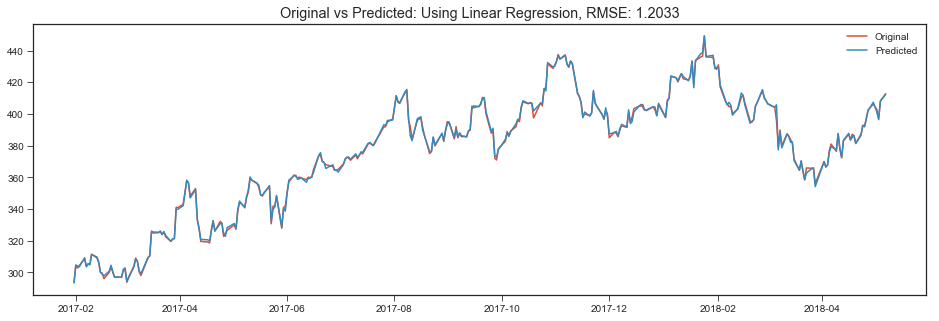

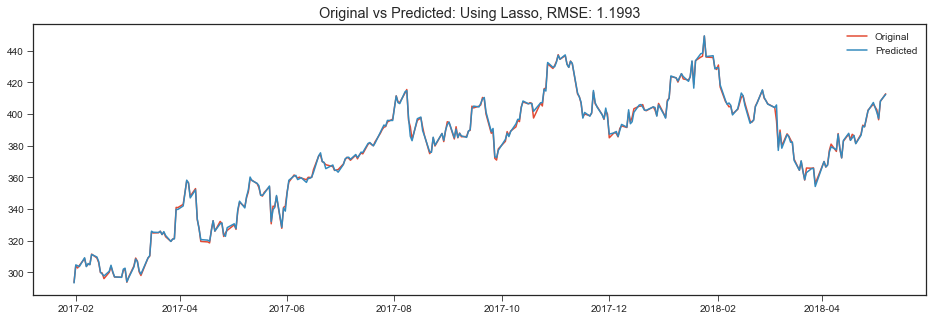

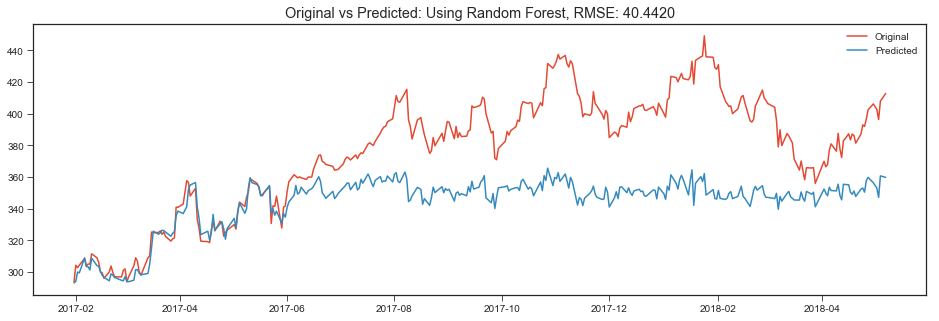

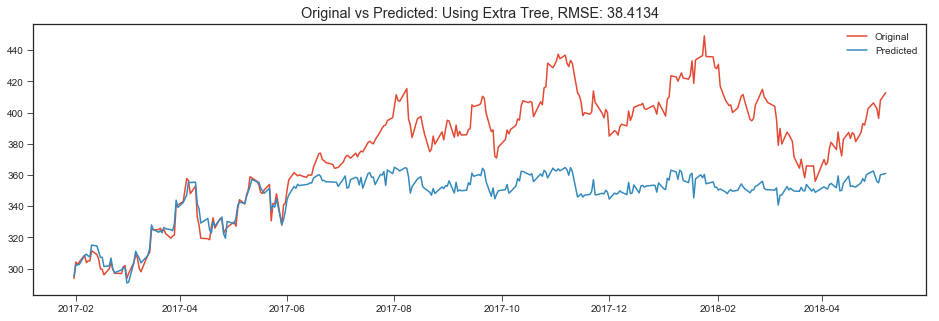

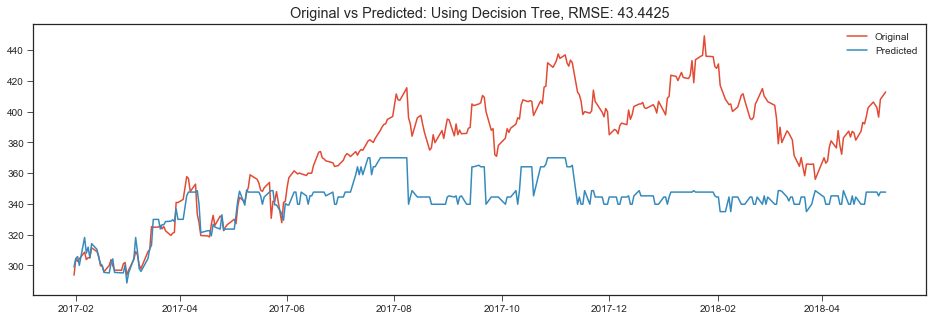

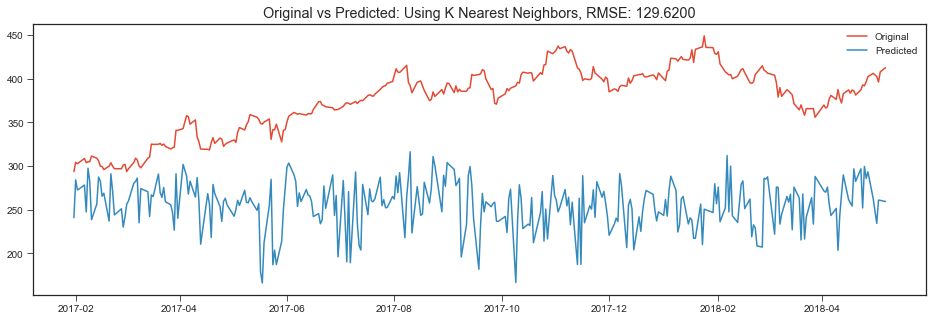

Finding the most profitable period...
The Max Profit Gain between the Date 2018-11-09 05:30:00 and 2018-11-28 05:30:00 is 40.124630919183915


In [19]:
read_data()